## 100 Days of ML Code: Day 3

## Multiple Linear Regression

<b>This notebook is for following along with Avik Jain's repository for practicing 100 days of Machine Learning.

The notebook's are intentionally short in order to reinforce on seperate parts of a ML solution.

<b>In Part 2 of the notebook, I implement my own solution in to provide a more complete analysis for future reference.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/50_Startups.csv'
data = pd.read_csv(url)

In [4]:
 data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
data.shape

(50, 5)

In [7]:
display(data.isnull().any())

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [8]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<b>R & D Spend is correlated with both Marketing Spend and Profit

In [10]:
X = data.iloc[ : , :-1].values
Y = data.iloc[ : ,  4 ].values

## Encoding Categorical Data

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X).toarray()

In [17]:
#Avoid Dummy Variable Trap
#R&D, Market, and Profit are highly correlated. 
X = X[: , 1:]

In [22]:
#Split into 80/20 Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =0)

In [23]:
#Fit Multiple Linear Regression to Training set
from sklearn.linear_model import LinearRegression
regres = LinearRegression()
regres.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#Predict Test Set
y_pred = regres.predict(X_test)

In [25]:
y_pred

array([108496.80991668, 116957.98942701, 108123.95203268, 101647.3617458 ,
       108123.95203268, 121241.7372738 , 126676.73043373, 118814.34350833,
       107788.10447491, 108123.95203268])

## Part 2: A full Multiple Linear Regression Solution

In [66]:
import seaborn as sns
profit = data['Profit']
marketing = data['Marketing Spend']
rnd = data['R&D Spend']

## RegPlot Marketing Spend and Profit

(0, 208592.55136412088)

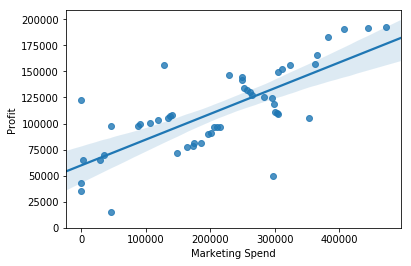

In [80]:
sns.regplot(x=data['Marketing Spend'],y=data['Profit'])
plt.ylim(0,)

In [77]:
## RegPlot and R & D Spend and Profit

(0, 213233.0063633178)

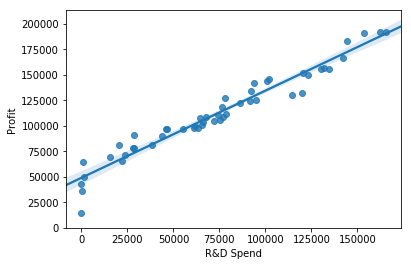

In [78]:
sns.regplot(x=data['R&D Spend'],y=data['Profit'])
plt.ylim(0,)

## RegPlot R & D Spend and Marketing Spend 

(0, 178038.5353819924)

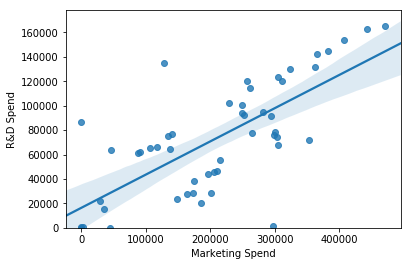

In [112]:
sns.regplot(x=data['Marketing Spend'],y=data['R&D Spend'])
plt.ylim(0,)

<B><font color = green> The RegPlot above would seem to indicate that the more we spend on Marketing, the more we Spend on Research and Development.
    
However, it is clear that these two variables do not have a direct impact on one another. As a company grows revenue and profits, it is likely that management will allocate more money to the budget of these two crucial areas.

## Predicting Profit based on R&D, Admin, and Marketing Spend

In [91]:
test_target = data
target = test_target['Profit']
features = test_target.iloc[:,0:3]

In [92]:
features.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [93]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=0)
regression_model = linear_model.LinearRegression().fit(X_train, y_train)

In [94]:
#LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

42989.00816508665
[0.77884104 0.0293919  0.03471025]


In [97]:
y_pred_test = regressor.predict(X_test)

In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predtest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predtest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predtest)))

Mean Absolute Error: 7320.4416148481305
Mean Squared Error: 77506468.16885428
Root Mean Squared Error: 8803.775790469354


In [99]:
coeff_df = pd.DataFrame(regressor.coef_, features.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
R&D Spend,0.778841
Administration,0.029392
Marketing Spend,0.034710


In [100]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predtest})
df.head(25)

,Actual,Predicted
28,103282.38,103901.896970
11,144259.40,132763.059931
10,146121.95,133567.903700
41,77798.83,72911.789767
2,191050.39,179627.925672
27,105008.31,115166.648648
38,81229.06,67113.576906
31,97483.56,98154.806868
22,110352.25,114756.115552
4,166187.94,169064.014088


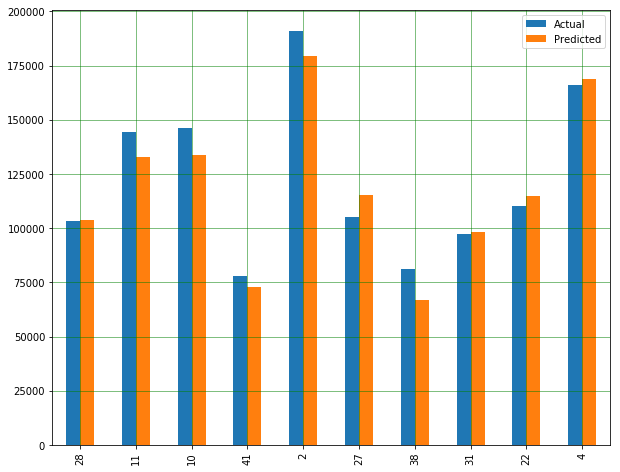

In [101]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [103]:
y_pred = regression_model.fit(X_train, y_train)
y_pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
regression_model.intercept_

42989.00816508665

In [105]:
scores = cross_val_score(regression_model, features, target, cv=10)
scores

array([  0.38227833,  -2.85512348,  -4.12576459, -15.29978431,
        -0.47288115,  -5.60898344, -10.03958016,  -2.39969596,
        -0.28079409,  -0.5918573 ])

In [106]:
print("The mean of the folds are", scores.mean(),"and the standard deviation is" ,scores.std())


The mean of the folds are -4.129218614482264 and the standard deviation is 4.770365805052497


<b><font color = green>If you wanted to dig deeper into this data, you could try doing a seperate analysis for each state. 
    
In addition, you could remove Administration as it does not provide much to the model